**Tesla Stock Price Prediction**

**Import all important libraries**

In [2]:
!pip install prophet

import prophet

In [3]:
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [5]:
import plotly.io as pio
pio.renderers.default='colab'

**Import the Dataset**

In [7]:
#read csv function from pandas
import yfinance as yf
import pandas as pd

# Get data for AAPL (Apple)
ticker = yf.Ticker("TSLA")

# Get historical data (e.g., last 1 year)
hist = ticker.history(period="1y")

# Save the data to a CSV file
hist.to_csv("TSLA_historical_data.csv")

In [9]:
df = pd.read_csv('TSLA_historical_data.csv')
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2024-04-12 00:00:00-04:00,172.339996,173.809998,170.360001,171.050003,64506600,0.0,0.0
1,2024-04-15 00:00:00-04:00,170.240005,170.690002,161.380005,161.479996,100245300,0.0,0.0
2,2024-04-16 00:00:00-04:00,156.740005,158.190002,153.750000,157.110001,97000000,0.0,0.0
3,2024-04-17 00:00:00-04:00,157.639999,158.330002,153.779999,155.449997,82439700,0.0,0.0
4,2024-04-18 00:00:00-04:00,151.250000,152.199997,148.699997,149.929993,96098800,0.0,0.0
...,...,...,...,...,...,...,...,...
246,2025-04-07 00:00:00-04:00,223.779999,252.000000,214.250000,233.289993,183453800,0.0,0.0
247,2025-04-08 00:00:00-04:00,245.000000,250.440002,217.800003,221.860001,171603500,0.0,0.0
248,2025-04-09 00:00:00-04:00,224.690002,274.690002,223.880005,272.200012,219433400,0.0,0.0
249,2025-04-10 00:00:00-04:00,260.000000,262.489990,239.330002,252.399994,181722600,0.0,0.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          251 non-null    object 
 1   Open          251 non-null    float64
 2   High          251 non-null    float64
 3   Low           251 non-null    float64
 4   Close         251 non-null    float64
 5   Volume        251 non-null    int64  
 6   Dividends     251 non-null    float64
 7   Stock Splits  251 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 15.8+ KB


In [11]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.0,251.0
mean,266.876973,273.376135,259.945777,266.694980,9.592227e+07,0.0,0.0
std,83.045320,85.056329,80.061753,82.580716,3.884142e+07,0.0,0.0
min,140.559998,144.440002,138.800003,142.050003,3.716760e+07,0.0,0.0
25%,206.205002,212.534996,201.720001,206.974998,6.747025e+07,0.0,0.0
50%,245.059998,251.160004,239.330002,246.380005,8.456500e+07,0.0,0.0
75%,339.435013,346.119995,327.854996,334.700012,1.142620e+08,0.0,0.0
max,475.899994,488.540009,457.510010,479.859985,2.438697e+08,0.0,0.0


**Data Visualization**

In [12]:
# line graph , area graph and box plot
px.area(df , x='Date' , y='Close' , title='Tesla Stock Price')

In [13]:
px.line(df , x='Date' , y='Close' , title='Tesla Stock Price')

In [14]:
px.area(df , x='Date' , y='Volume' , title='Tesla Stock Price')

In [15]:
px.bar(df , x='Date' , y='Volume' , title='Tesla Stock Price')

In [16]:
px.box(df , y='Close')

**Data Preparation**

In [17]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2024-04-12 00:00:00-04:00,172.339996,173.809998,170.360001,171.050003,64506600,0.0,0.0
1,2024-04-15 00:00:00-04:00,170.240005,170.690002,161.380005,161.479996,100245300,0.0,0.0
2,2024-04-16 00:00:00-04:00,156.740005,158.190002,153.750000,157.110001,97000000,0.0,0.0
3,2024-04-17 00:00:00-04:00,157.639999,158.330002,153.779999,155.449997,82439700,0.0,0.0
4,2024-04-18 00:00:00-04:00,151.250000,152.199997,148.699997,149.929993,96098800,0.0,0.0
...,...,...,...,...,...,...,...,...
246,2025-04-07 00:00:00-04:00,223.779999,252.000000,214.250000,233.289993,183453800,0.0,0.0
247,2025-04-08 00:00:00-04:00,245.000000,250.440002,217.800003,221.860001,171603500,0.0,0.0
248,2025-04-09 00:00:00-04:00,224.690002,274.690002,223.880005,272.200012,219433400,0.0,0.0
249,2025-04-10 00:00:00-04:00,260.000000,262.489990,239.330002,252.399994,181722600,0.0,0.0


In [18]:
columns = ['Date', 'Close']
ndf = pd.DataFrame(df, columns=columns) #create a new dataframe of column date and close

In [19]:
ndf

,Date,Close
0,2024-04-12 00:00:00-04:00,171.050003
1,2024-04-15 00:00:00-04:00,161.479996
2,2024-04-16 00:00:00-04:00,157.110001
3,2024-04-17 00:00:00-04:00,155.449997
4,2024-04-18 00:00:00-04:00,149.929993
...,...,...
246,2025-04-07 00:00:00-04:00,233.289993
247,2025-04-08 00:00:00-04:00,221.860001
248,2025-04-09 00:00:00-04:00,272.200012
249,2025-04-10 00:00:00-04:00,252.399994


In [24]:
prophet_df= ndf.rename(columns={'Date':'ds' , 'Close':'y'})

In [25]:
prophet_df

,ds,y
0,2024-04-12 00:00:00-04:00,171.050003
1,2024-04-15 00:00:00-04:00,161.479996
2,2024-04-16 00:00:00-04:00,157.110001
3,2024-04-17 00:00:00-04:00,155.449997
4,2024-04-18 00:00:00-04:00,149.929993
...,...,...
246,2025-04-07 00:00:00-04:00,233.289993
247,2025-04-08 00:00:00-04:00,221.860001
248,2025-04-09 00:00:00-04:00,272.200012
249,2025-04-10 00:00:00-04:00,252.399994


**Creating Facebook Prophet Model**

In [28]:
prophet_df['ds'] = pd.to_datetime(prophet_df['ds']).dt.tz_localize(None) #remove timezone from 'ds' column
m = Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jdeep_5/qni2xzie.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jdeep_5/1sa9q0pm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98091', 'data', 'file=/tmp/tmp4jdeep_5/qni2xzie.json', 'init=/tmp/tmp4jdeep_5/1sa9q0pm.json', 'output', 'file=/tmp/tmp4jdeep_5/prophet_modelsu9wv8n8/prophet_model-20250412070619.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:06:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [31]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-04-12 04:00:00,173.167553,129.076779,191.771394,173.167553,173.167553,-12.111014,-12.111014,-12.111014,-12.111014,-12.111014,-12.111014,0.0,0.0,0.0,161.056539
1,2024-04-15 04:00:00,174.667208,132.702712,193.406058,174.667208,174.667208,-12.859878,-12.859878,-12.859878,-12.859878,-12.859878,-12.859878,0.0,0.0,0.0,161.807330
2,2024-04-16 04:00:00,175.167092,136.138228,194.927456,175.167092,175.167092,-10.421151,-10.421151,-10.421151,-10.421151,-10.421151,-10.421151,0.0,0.0,0.0,164.745941
3,2024-04-17 04:00:00,175.666977,135.220843,195.863257,175.666977,175.666977,-11.166087,-11.166087,-11.166087,-11.166087,-11.166087,-11.166087,0.0,0.0,0.0,164.500890
4,2024-04-18 04:00:00,176.166862,136.357335,194.396958,176.166862,176.166862,-10.656514,-10.656514,-10.656514,-10.656514,-10.656514,-10.656514,0.0,0.0,0.0,165.510349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2025-05-07 04:00:00,180.891672,137.727031,200.040113,172.036531,188.770236,-11.166087,-11.166087,-11.166087,-11.166087,-11.166087,-11.166087,0.0,0.0,0.0,169.725585
277,2025-05-08 04:00:00,178.789376,137.245921,198.020230,169.490203,187.263484,-10.656514,-10.656514,-10.656514,-10.656514,-10.656514,-10.656514,0.0,0.0,0.0,168.132862
278,2025-05-09 04:00:00,176.687080,133.955176,197.912373,166.962422,185.605710,-12.111014,-12.111014,-12.111014,-12.111014,-12.111014,-12.111014,0.0,0.0,0.0,164.576066
279,2025-05-10 04:00:00,174.584783,240.240691,303.171936,164.114074,184.042662,94.463303,94.463303,94.463303,94.463303,94.463303,94.463303,0.0,0.0,0.0,269.048086


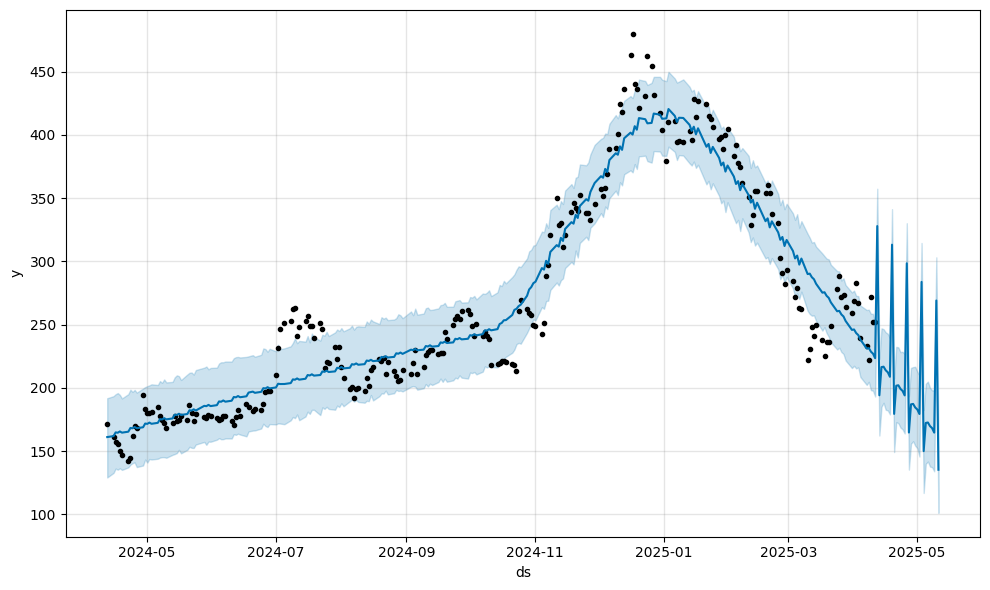

In [34]:
figure1 = m.plot(forecast)

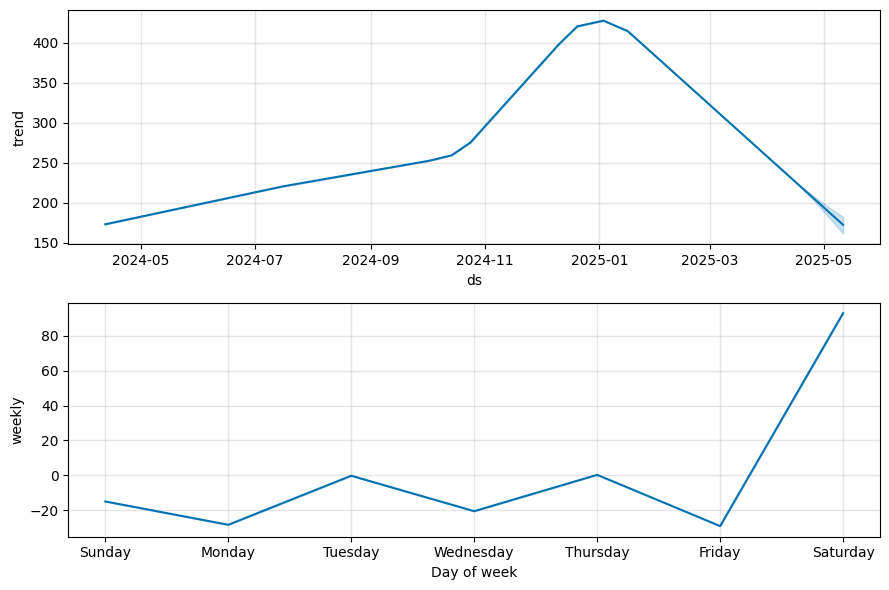

In [35]:
figure2 = m.plot_components(forecast)

**Download foecast data**

In [37]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>